# Scattering Truncation Corrections

The study of aerosol optical properties, such as Single Scattering Albedo (SSA), plays a crucial role in understanding the effects of aerosols on climate and air quality. SSA, a measure of the fraction of light scattered by particles relative to the total light extinction (scattering plus absorption), is essential for assessing aerosol radiative forcing. Instruments like the Cavity Attenuated Phase Shift (CAPS) SSA instrument are pivotal in making these measurements with high accuracy and reliability. However, one of the critical challenges in accurately determining SSA, especially with the CAPS instrument, is the phenomenon of scattering truncation.

### The Importance of Correcting for Scattering Truncation

Scattering truncation occurs due to the limited angular range over which scattering measurements can be made, leading to an underestimation of the total scattering by aerosol particles. This limitation is particularly pronounced in instruments like the CAPS, where the design inherently restricts the detection of scattered light to a finite angular range (missing some back scatter and forward scattering light). The consequence of this truncation is a potential bias (low) in the measured SSA values, which can significantly affect the interpretation of aerosol optical properties and, by extension, their climatic and environmental impacts.

### Size-Dependent Nature of Scattering Truncation

The extent of scattering truncation is not uniform across all particle sizes; rather, it exhibits a pronounced size dependency. This variation arises because the scattering efficiency and the angular distribution of scattered light are functions of particle size relative to the wavelength of the incident light. Smaller particles tend to scatter light more isotropically, while larger particles preferentially scatter light in the forward direction. As a result, instruments with limited angular detection ranges may miss a substantial portion of the forward-scattered light from larger particles, leading to more significant truncation effects for these particle sizes.

### Addressing the Challenge

Correcting for scattering truncation is thus vital for ensuring the accuracy of SSA measurements and, by extension, our understanding of aerosol optical properties. This notebook focuses on methodologies for correcting scattering truncation effects in SSA measurements made using the CAPS instrument. By implementing these corrections, we aim to achieve more accurate and representative SSA values, enhancing our ability to model and predict aerosol impacts on atmospheric processes.

The following sections will delve into scattering truncation, explore its size-dependent characteristics, and introduce correction techniques tailored to the CAPS SSA instrument.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# particula imports
from particula.util import convert, distribution_discretization
from particula.data.process import scattering_truncation


## Addressing Scattering Truncation for Single Particle Measurements

In the quest to accurately assess aerosol optical properties using the Cavity Attenuated Phase Shift (CAPS) SSA instrument, accounting for scattering truncation is paramount. Scattering truncation arises due to the instrument's limited angular range in capturing scattered light, necessitating corrections to obtain true scattering coefficients. This section introduces the methodology to correct for scattering truncation for a single aerosol particle using the `scattering_truncation.trunc_mono` function.

### Implementing Truncation Correction with Python

The process begins by defining the optical properties of the particle (refractive index and wavelength) and calculating both the ideal (untruncated) and the actual (truncated) scattering efficiencies. We then determine the correction factor needed to adjust for the truncation effect observed with the CAPS instrument.

#### Insights from Truncation Correction

- **Ideal vs. Truncated Scattering Efficiency**: The `qsca_ideal` output represents the scattering efficiency as if measured by a perfect instrument with no angular limitations. In contrast, `qsca_trunc` reflects the efficiency as captured by the CAPS instrument, which is inherently limited by scattering truncation.
  
- **Correction Factor**: The `trunc_corr` value indicates the factor by which the measured (truncated) scattering efficiency needs to be adjusted to align with the ideal, untruncated scenario. This correction is crucial for accurately interpreting SSA measurements and understanding aerosol scattering behaviors.

This correction approach for a single particle lays the groundwork for more comprehensive analyses.

In [3]:
# Define the refractive index of the aerosol particle and the light wavelength
m_sphere = 1.5  # Refractive index of the particle
wavelength = 450.0  # Wavelength of incident light in nanometers (nm)

# Perform the truncation correction for a single particle of a given diameter
trunc_corr, z_axis, qsca_trunc, qsca_ideal, theta1, theta2 = scattering_truncation.trunc_mono(
    m_sphere=m_sphere,  # Refractive index of the particle
    wavelength=wavelength,  # Wavelength of incident light
    diameter=100,  # Diameter of the particle in nanometers
    full_output=True,  # Request full output for detailed analysis
    calibrate_trunc=True
)

# Output the calculated scattering efficiencies and truncation correction
# factor
print(f"Ideal Q_sca: {qsca_ideal} for a perfect instrument")
print(f"Truncated Q_sca: {qsca_trunc} for a truncated CAPS instrument")
print(f"Truncation correction factor: {trunc_corr}")

Ideal Q_sca: 0.5478174528225523 for a perfect instrument
Truncated Q_sca: 0.5363833503036408 for a truncated CAPS instrument
Truncation correction factor: 0.99888593093735


## Full Size Dependence of Truncation

The size-dependent nature of scattering truncation necessitates a thorough understanding of how the phenomenon varies across different particle sizes. This section explores the full size dependence of scattering truncation and introduces the `scattering_truncation.truncation_for_diameters` function to correct for truncation effects across a range of particle sizes.

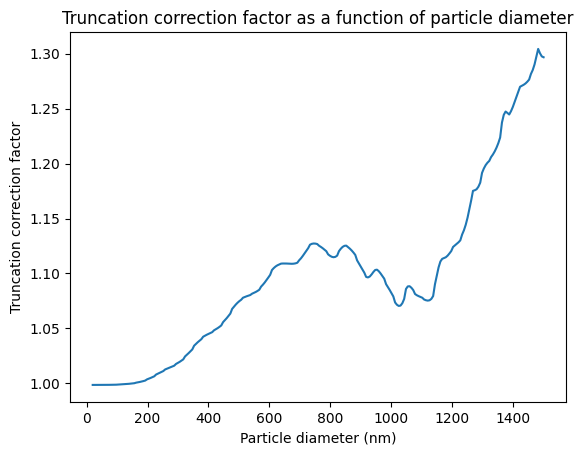

In [7]:
diameters = np.linspace(20, 1500, 250)  # From 20 nm to 1000 nm with 500 points

truncation_array = scattering_truncation.truncation_for_diameters(
    m_sphere=m_sphere,
    wavelength=wavelength,
    diameter_sizes=diameters,
    discretize=True,
    calibrate_trunc=True
)

# Plot the truncation correction factor as a function of particle diameter
plt.figure()
plt.plot(diameters, truncation_array)
plt.xlabel('Particle diameter (nm)')
plt.ylabel('Truncation correction factor')
plt.title('Truncation correction factor as a function of particle diameter')
plt.show()